In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/tamrin2/diabetes.csv")

### insulin can not be 0 in blood test, so mayby Insulin=0 in this dataset means, that person doesn't take blood test, and it is missing value

In [ ]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
num_missing=0
for item in data['Insulin']:
  if (item==0):
    num_missing += 1

num_missing

374

### there are so many zero value for "Insulin" featur. i thing it's better to be deleted
## delete missing values:

In [ ]:
#datanew = data.drop((data.Insulin==0).index,inplace=False)
for item in data['Insulin']:
  if (item==0):
    data.drop(data[data.Insulin==0].index,inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [ ]:
data.shape

(394, 9)

# No missing value

In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               394 non-null    int64  
 1   Glucose                   394 non-null    int64  
 2   BloodPressure             394 non-null    int64  
 3   SkinThickness             394 non-null    int64  
 4   Insulin                   394 non-null    int64  
 5   BMI                       394 non-null    float64
 6   DiabetesPedigreeFunction  394 non-null    float64
 7   Age                       394 non-null    int64  
 8   Outcome                   394 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.8 KB


(394, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721,0.329949
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971,0.470792
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### "Insulin" feature has diffirent std compare to other features's std. so it should be better Scale.

<Axes: xlabel='Age', ylabel='Count'>

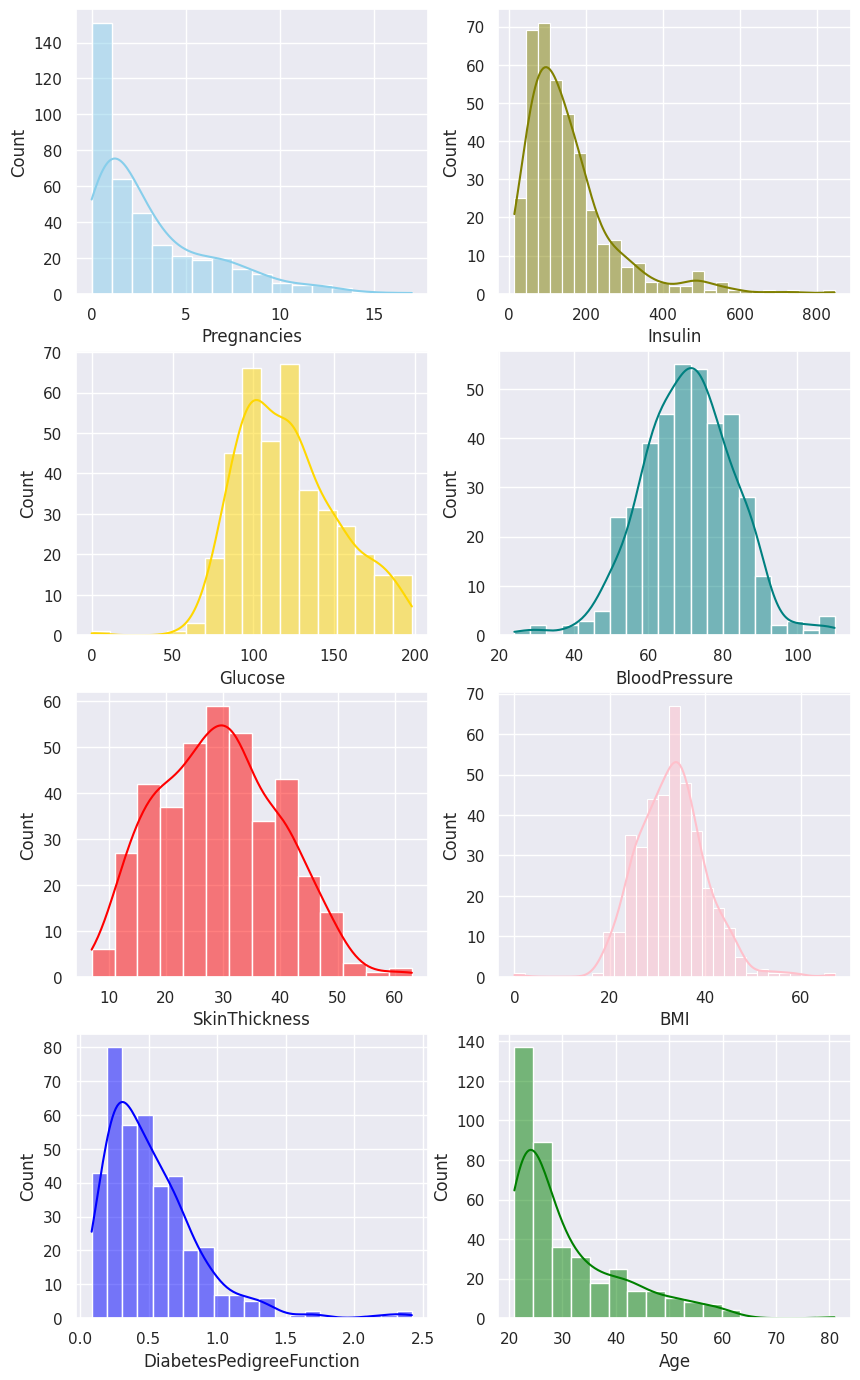

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(4, 2, figsize=(10, 17))

sns.histplot(data=data, x="Pregnancies", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="Insulin", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="Glucose", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data, x="BloodPressure", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data, x="SkinThickness", kde=True, color="red", ax=axs[2,0])
sns.histplot(data=data, x="BMI", kde=True, color="pink", ax=axs[2, 1])
sns.histplot(data=data, x="DiabetesPedigreeFunction", kde=True, color="blue", ax=axs[3, 0])
sns.histplot(data=data, x="Age", kde=True, color="green", ax=axs[3, 1])


### "BloodPresure", "BMI", "SkinThinkness" almost have normal distribution. but other features doesn't have.It could effect to out results.

<Axes: >

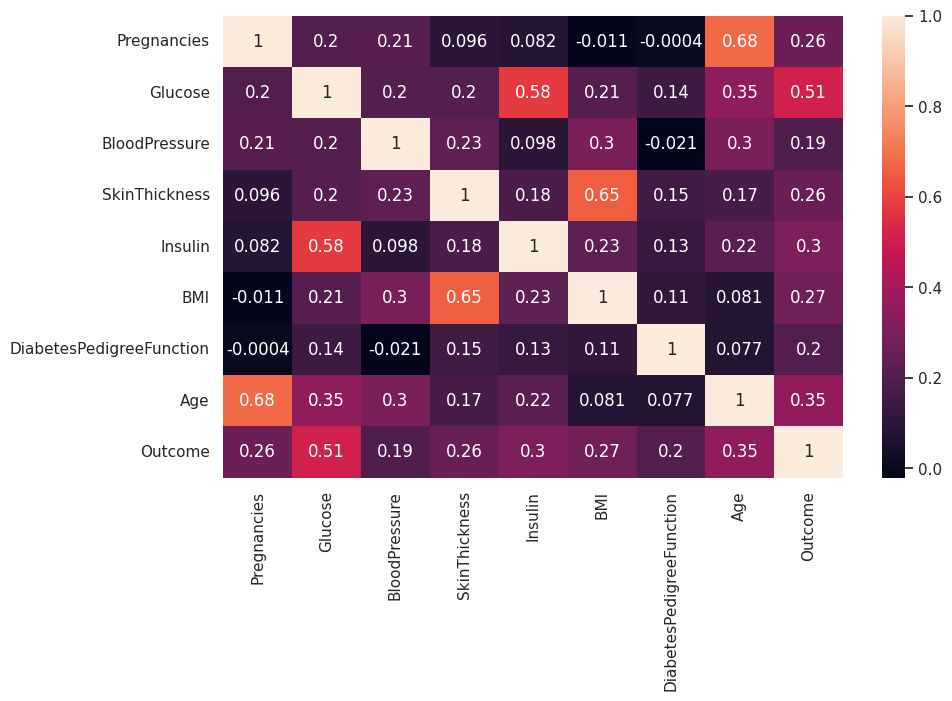

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

### the most effective feature is "Glucose"

<Axes: xlabel='Age', ylabel='Outcome'>

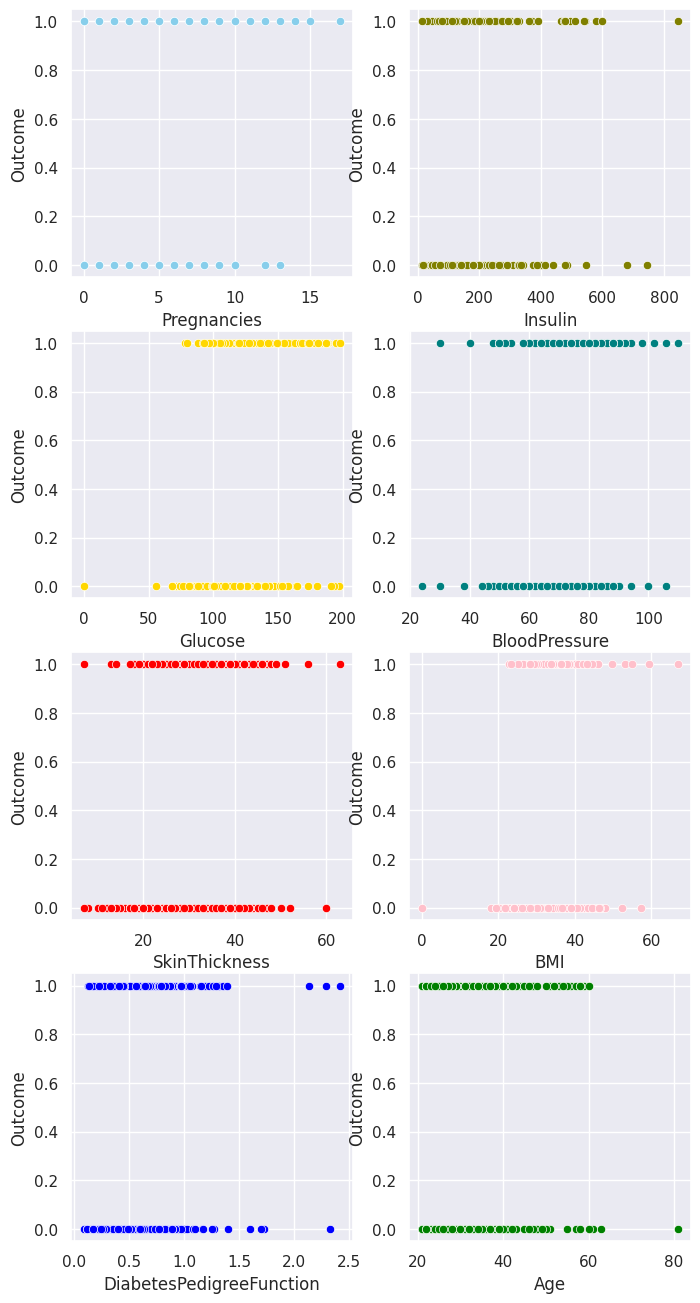

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(4, 2, figsize=(8, 16))

sns.scatterplot(data=data, x="Pregnancies", color="skyblue", y="Outcome",ax=axs[0, 0])
sns.scatterplot(data=data, x="Insulin", color="olive", y="Outcome",ax=axs[0, 1])
sns.scatterplot(data=data, x="Glucose", color="gold", y="Outcome",ax=axs[1, 0])
sns.scatterplot(data=data, x="BloodPressure", color="teal", y="Outcome",ax=axs[1, 1])
sns.scatterplot(data=data, x="SkinThickness", color="red", y="Outcome",ax=axs[2, 0])
sns.scatterplot(data=data, x="BMI", color="pink",y="Outcome", ax=axs[2, 1])
sns.scatterplot(data=data, x="DiabetesPedigreeFunction", y="Outcome",color="blue", ax=axs[3, 0])
sns.scatterplot(data=data, x="Age", color="green", y="Outcome",ax=axs[3, 1])


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

In [ ]:
from re import X
def train_ecaluate_model(model, xTrain, yTrain,xTest, yTest):
  model.fit(xTrain,yTrain)
  predictions = model.predict(xTest)
  accuracy = accuracy_score(yTest,predictions)
  f1 = f1_score(yTest,predictions)
  precision = precision_score(yTest,predictions)
  recall = recall_score(yTest,predictions)
  balanced_accuracy = balanced_accuracy_score(yTest,predictions)

  eval_df = pd.DataFrame([[accuracy,f1,precision,recall,balanced_accuracy]],columns=['accuracy','f1','precision','recall','balanced_accuracy'])
  return eval_df

In [ ]:
x = data[['Pregnancies','Glucose',	'BloodPressure'	,'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']]
y = data['Outcome']
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3, random_state=42)

## Logistic Regression

In [ ]:
logesticReg = LogisticRegression(max_iter=500)
results = train_ecaluate_model(logesticReg,xTrain,yTrain,xTest,yTest)

In [ ]:
results.index = ['LogisticReg']
results.sort_values(by='f1',ascending=False).style.background_gradient(cmap = sns.color_palette("flare", as_cmap=True))

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.798319,0.636364,0.724138,0.567568,0.735003


## Random Forest Classifier

In [ ]:
randomForest = RandomForestClassifier()
RandomForestResult = train_ecaluate_model(randomForest,xTrain,yTrain,xTest,yTest)

In [ ]:
RandomForestResult.index = ['RandomForest']
results = pd.concat([results,RandomForestResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.798319,0.636364,0.724138,0.567568,0.735003
RandomForest,0.781513,0.593750,0.703704,0.513514,0.707976


## SVM

In [ ]:
SVC = SVC()
SVMResult = train_ecaluate_model(SVC,xTrain,yTrain,xTest,yTest)

In [ ]:
SVMResult.index = ['SVM']
results = pd.concat([results,SVMResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.798319,0.636364,0.724138,0.567568,0.735003
RandomForest,0.781513,0.593750,0.703704,0.513514,0.707976
SVM,0.815126,0.645161,0.800000,0.540541,0.739782


## SGD Classifier

In [ ]:
SGD = SGDClassifier(penalty="l2", max_iter=5)
SGDResult = train_ecaluate_model(SGD,xTrain,yTrain,xTest,yTest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
SGDResult.index = ['SGD']
results = pd.concat([results,SGDResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.798319,0.636364,0.724138,0.567568,0.735003
RandomForest,0.781513,0.593750,0.703704,0.513514,0.707976
SVM,0.815126,0.645161,0.800000,0.540541,0.739782
SGD,0.655462,0.577320,0.466667,0.756757,0.683256


## K Neighbors Classifier

In [ ]:
KNC = KNeighborsClassifier(n_neighbors=5,weights='distance')
KNCResult = train_ecaluate_model(KNC,xTrain,yTrain,xTest,yTest)

In [ ]:
KNCResult.index = ['KNC']
results = pd.concat([results,KNCResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.798319,0.636364,0.724138,0.567568,0.735003
RandomForest,0.781513,0.593750,0.703704,0.513514,0.707976
SVM,0.815126,0.645161,0.800000,0.540541,0.739782
SGD,0.655462,0.577320,0.466667,0.756757,0.683256
KNC,0.739496,0.550725,0.593750,0.513514,0.677488


## GaussianNB

In [ ]:
GaussianNB = GaussianNB()
GaussianNBResult = train_ecaluate_model(GaussianNB,xTrain,yTrain,xTest,yTest)

In [ ]:
GaussianNBResult.index = ['GaussianNB']
results = pd.concat([results,GaussianNBResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.798319,0.636364,0.724138,0.567568,0.735003
RandomForest,0.781513,0.593750,0.703704,0.513514,0.707976
SVM,0.815126,0.645161,0.800000,0.540541,0.739782
SGD,0.655462,0.577320,0.466667,0.756757,0.683256
KNC,0.739496,0.550725,0.593750,0.513514,0.677488
GaussianNB,0.764706,0.611111,0.628571,0.594595,0.718029


## Decision Tree Classifier

In [ ]:
DecisionTree = DecisionTreeClassifier()
DTResult = train_ecaluate_model(DecisionTree,xTrain,yTrain,xTest,yTest)

In [ ]:
DTResult.index = ['DecisionTree']
results = pd.concat([results,DTResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.798319,0.636364,0.724138,0.567568,0.735003
RandomForest,0.781513,0.593750,0.703704,0.513514,0.707976
SVM,0.815126,0.645161,0.800000,0.540541,0.739782
SGD,0.655462,0.577320,0.466667,0.756757,0.683256
KNC,0.739496,0.550725,0.593750,0.513514,0.677488
GaussianNB,0.764706,0.611111,0.628571,0.594595,0.718029
DecisionTree,0.764706,0.650000,0.604651,0.702703,0.747693


# Make it better


1.   delete rows that correlations are less than 0.3 with outcome



In [ ]:
corr = data.corr()
corr_target = abs (corr['Outcome'])
relevant_features = corr_target[corr_target > 0.3]
names = [index for index, value in relevant_features.items()]
names.remove('Outcome')

x = data[names]
y = data['Outcome']

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3, random_state=42)

2.   Scaling parameters



In [ ]:
scaler = StandardScaler()
scaler.fit(xTrain)
scaler.transform(xTrain)
scaler.transform(xTest)


array([[-7.01132418e-01, -4.44364282e-01,  1.46760422e+00],
       [-1.50936269e+00, -8.41433825e-01, -6.64575496e-01],
       [ 1.10930340e+00,  1.36270731e+00,  4.52280546e-01],
       [ 1.23862025e+00, -4.84881583e-01, -5.63043128e-01],
       [ 1.85287526e+00,  2.83753704e+00, -4.61510761e-01],
       [-2.48523463e-01, -5.90226563e-01,  6.55345280e-01],
       [-1.70333796e+00, -6.79364624e-01, -8.67640230e-01],
       [-1.05675374e+00,  4.06499024e-01, -5.63043128e-01],
       [-1.19206618e-01, -4.44364282e-01, -1.56913659e-01],
       [ 1.85287526e+00,  2.60636743e-01,  2.07679842e+00],
       [ 7.47686482e-02,  6.09085525e-01, -3.59978393e-01],
       [ 1.56191236e+00,  3.39667578e+00, -2.58446026e-01],
       [-1.80032559e+00, -7.60399225e-01, -5.63043128e-01],
       [-7.01132418e-01, -3.22812382e-01, -7.66107863e-01],
       [-2.16194251e-01, -4.44364282e-01,  1.16300712e+00],
       [-1.21839979e+00, -7.68502685e-01, -1.56913659e-01],
       [ 2.24082579e+00,  1.74356993e+00

# Test algorithms again

In [ ]:
logesticReg = LogisticRegression(max_iter=500,random_state=42)
results = train_ecaluate_model(logesticReg,xTrain,yTrain,xTest,yTest)
parames = logesticReg.intercept_
parames
logesticReg.score(xTest,yTest)

0.8151260504201681

In [ ]:
xTrain.columns

Index(['Glucose', 'Insulin', 'Age'], dtype='object')

In [ ]:
logesticReg.coef_

array([[ 0.03578237, -0.00025329,  0.06633401]])

In [ ]:
results.index = ['LogisticReg']
results.sort_values(by='f1',ascending=False).style.background_gradient(cmap = sns.color_palette("flare", as_cmap=True))

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.815126,0.666667,0.758621,0.594595,0.754614


In [ ]:
randomForest = RandomForestClassifier(random_state=42,n_estimators=200)
RandomForestResult = train_ecaluate_model(randomForest,xTrain,yTrain,xTest,yTest)

In [ ]:
randomForest.score(xTest,yTest)

0.7899159663865546

In [ ]:
randomForest.feature_importances_

array([0.37971197, 0.32957996, 0.29070806])

In [ ]:
RandomForestResult.index = ['RandomForest']
results = pd.concat([results,RandomForestResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.815126,0.666667,0.758621,0.594595,0.754614
RandomForest,0.789916,0.637681,0.687500,0.594595,0.736322


In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC = SVC(random_state=0,degree=5)
SVMResult = train_ecaluate_model(SVC,xTrain,yTrain,xTest,yTest)
print (f'C: ',{SVC.C})
print (f'C: ',{SVC.n_features_in_})

C:  {1.0}
C:  {3}


In [ ]:
SVC.score(xTest,yTest)

0.7983193277310925

In [ ]:
SVMResult.index = ['SVM']
results = pd.concat([results,SVMResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.815126,0.666667,0.758621,0.594595,0.754614
RandomForest,0.789916,0.637681,0.687500,0.594595,0.736322
SVM,0.798319,0.612903,0.760000,0.513514,0.720171


In [ ]:
SGD = SGDClassifier(random_state=0,alpha=0.01)
SGDResult = train_ecaluate_model(SGD,xTrain,yTrain,xTest,yTest)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
SGD.score(xTest,yTest)

0.6890756302521008

In [ ]:
SGDResult.index = ['SGD']
results = pd.concat([results,SGDResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.815126,0.666667,0.758621,0.594595,0.754614
RandomForest,0.789916,0.637681,0.687500,0.594595,0.736322
SVM,0.798319,0.612903,0.760000,0.513514,0.720171
SGD,0.689076,0.000000,0.000000,0.000000,0.500000


In [ ]:
KNC = KNeighborsClassifier(n_neighbors=5,weights='distance',random_state=0)
KNCResult = train_ecaluate_model(KNC,xTrain,yTrain,xTest,yTest)

In [ ]:
KNCResult.index = ['KNC']
results = pd.concat([results,KNCResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.815126,0.666667,0.758621,0.594595,0.754614
RandomForest,0.789916,0.637681,0.687500,0.594595,0.736322
SVM,0.798319,0.612903,0.760000,0.513514,0.720171
SGD,0.689076,0.000000,0.000000,0.000000,0.500000
KNC,0.764706,0.600000,0.636364,0.567568,0.710613


In [ ]:
GaussianNB = GaussianNB(random_state=0)
GaussianNBResult = train_ecaluate_model(GaussianNB,xTrain,yTrain,xTest,yTest)

In [ ]:
GaussianNBResult.index = ['GaussianNB']
results = pd.concat([results,GaussianNBResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.815126,0.666667,0.758621,0.594595,0.754614
RandomForest,0.789916,0.637681,0.687500,0.594595,0.736322
SVM,0.798319,0.612903,0.760000,0.513514,0.720171
SGD,0.689076,0.000000,0.000000,0.000000,0.500000
KNC,0.764706,0.600000,0.636364,0.567568,0.710613
GaussianNB,0.798319,0.647059,0.709677,0.594595,0.742419


In [ ]:
DecisionTree = DecisionTreeClassifier(random_state=0)
DTResult = train_ecaluate_model(DecisionTree,xTrain,yTrain,xTest,yTest)

In [ ]:
DTResult.index = ['DecisionTree']
results = pd.concat([results,DTResult])
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticReg,0.815126,0.666667,0.758621,0.594595,0.754614
RandomForest,0.789916,0.637681,0.687500,0.594595,0.736322
SVM,0.798319,0.612903,0.760000,0.513514,0.720171
SGD,0.689076,0.000000,0.000000,0.000000,0.500000
KNC,0.764706,0.600000,0.636364,0.567568,0.710613
GaussianNB,0.798319,0.647059,0.709677,0.594595,0.742419
DecisionTree,0.722689,0.571429,0.550000,0.594595,0.687541


### "Logistic regresion" is better than others Models.

In [ ]:
logesticReg.feature_names_in_

array(['Glucose', 'Insulin', 'Age'], dtype=object)

In [ ]:
logesticReg.coef_

array([[ 0.03578237, -0.00025329,  0.06633401]])

### at first "Age", than "Glucose" and than "Insulin" is important features